In [1]:
#Importing signal data to Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

signal_data = pd.read_csv('D:/testapi/ml_testing/data/adc_38_data.csv', header = None)
signal_data

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,64,32768,1,1,512,0,1953125,12,0,0,...,10,13,13,11,11,12,17,18,14,13
1,64,32768,1,1,512,0,1953125,12,0,0,...,10,13,13,11,11,12,17,18,14,13
2,64,32768,1,1,512,0,1953125,12,0,0,...,-3,1,9,8,3,-2,-5,-3,-3,1
3,64,32768,1,1,512,0,1953125,12,0,0,...,4,2,4,5,8,8,3,-1,1,1
4,64,32768,1,1,512,0,1953125,12,0,0,...,3,6,4,3,4,2,3,6,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64,32768,1,1,512,0,1953125,12,0,0,...,-7,-9,-12,-16,-16,-13,-12,-9,-11,-6
96,64,32768,1,1,512,0,1953125,12,0,0,...,-4,-3,-3,-6,-2,-2,4,6,10,13
97,64,32768,1,1,512,0,1953125,12,0,0,...,-6,-8,-4,-6,-10,-11,-11,-12,-8,-9
98,64,32768,1,1,512,0,1953125,12,0,0,...,-20,-15,-12,-9,-7,-13,-7,-5,-5,-7


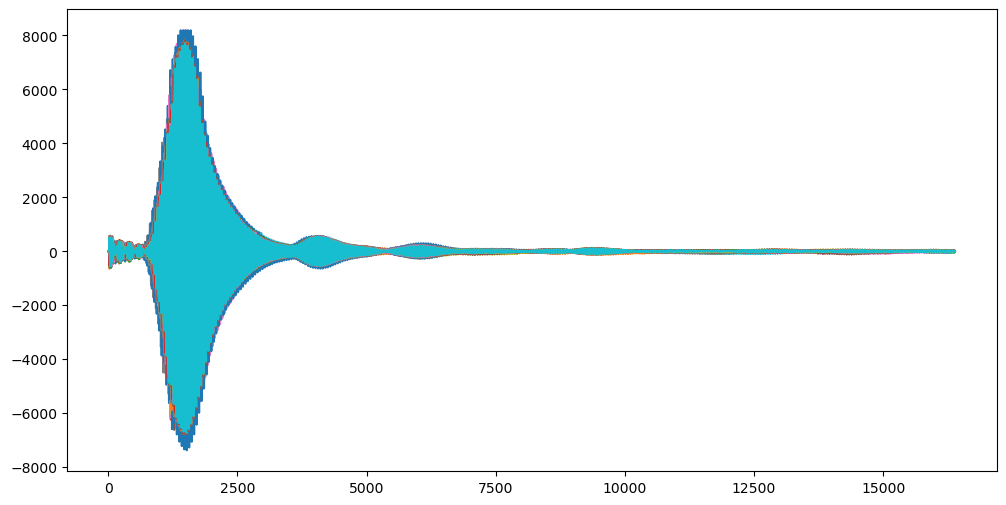

In [2]:
#Loading signal data to data frame

df = pd.DataFrame(signal_data)

# Plot all the signals
plt.figure(figsize=(12, 6))
for i in range(df.shape[0]):
    #Ignoring the first 16 columns
    signal = df.iloc[i].iloc[16:]
    plt.plot(signal)
plt.show()

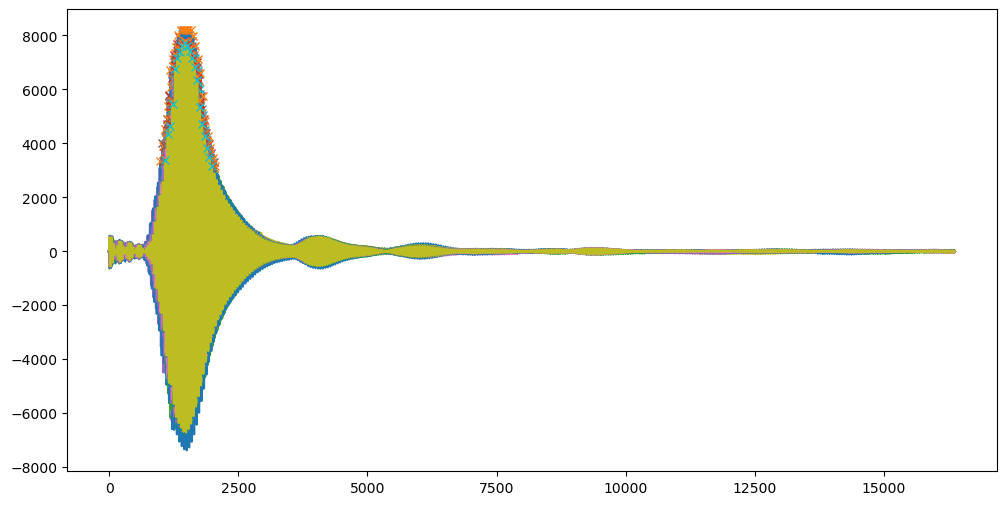

In [3]:
from scipy.signal import find_peaks

# Plot all the signals
plt.figure(figsize=(12, 6))
for i in range(df.shape[0]):
    signal = df.iloc[i].iloc[16:]
    peaks, _ = find_peaks(signal.values[:], prominence=6000) # Adjust the prominence value to get the peaks as per the requirement
    plt.plot(signal.values[:])
    plt.plot(peaks, signal.values[:][peaks], 'x')  # Plotting the peaks for visualisation
plt.show()

In [4]:
# Create a list with signal name, signal data and peaks and load all the signals
# Removing first 16 columns

signal_dictionary = []

for i in range(df.shape[0]):
    signal = df.iloc[i].iloc[16:]
    peaks, _ = find_peaks(signal.values[:], prominence=3000)
    key = f'S{i+1}'
    signal_dictionary.append((key, signal, peaks))

signal_dictionary

[('S1',
  16        -5
  17        -5
  18         0
  19       546
  20       541
          ... 
  16379     12
  16380     17
  16381     18
  16382     14
  16383     13
  Name: 0, Length: 16368, dtype: object,
  array([ 985, 1033, 1081, 1129, 1176, 1224, 1271, 1319, 1367, 1415, 1463,
         1511, 1558, 1606, 1653, 1701, 1749, 1797, 1844, 1891, 1939, 1986,
         2033, 2080, 2127, 2174, 2221, 2268, 2315], dtype=int64)),
 ('S2',
  16       -14
  17       -15
  18       -22
  19       -21
  20       470
          ... 
  16379     12
  16380     17
  16381     18
  16382     14
  16383     13
  Name: 1, Length: 16368, dtype: object,
  array([ 982, 1030, 1078, 1126, 1173, 1221, 1268, 1316, 1364, 1412, 1460,
         1508, 1555, 1603, 1650, 1698, 1746, 1794, 1841, 1888, 1936, 1983,
         2030, 2077, 2124, 2171, 2218, 2265], dtype=int64)),
 ('S3',
  16        -9
  17       -11
  18        -8
  19       463
  20       425
          ... 
  16379     -2
  16380     -5
  16381     -3
 

In [5]:
# Initialising the signal list dictionary where the updated signal data will be stored with real annotated peak
# Also used for resetting the list of signal data

updated_signal_dictionary = []

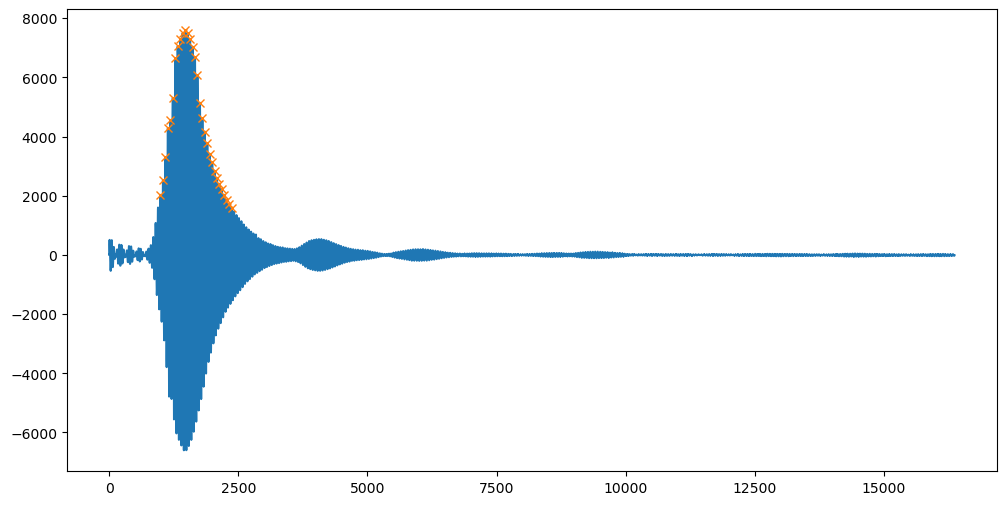

Top Peaks in this signal: [2031 2527 3311 4292 4563 5311 6646 7048 7290 7495 7592 7500 7304 7038
 6688 6065 5143 4616 4168 3769 3421 3124 2845 2608 2405 2221 2032 1863
 1721 1601]


In [6]:
# Function to plot the signal with peaks and get the real peak value from the user
# Used to annotate the real peak value in the signal data
# This can be run multiple times to annotate the real peaks for multiple signals
# If you do not see values of top peaks below the signal plot, please do not enter any value(just press enter) and run this cell again
# List of signals with no real peak values will be dropped later

def plot_signal_peaks(signal_key):
    for key, signal, peaks in signal_dictionary:
        if key == signal_key:
            plt.figure(figsize=(12, 6))
            plt.plot(signal.values[:])
            plt.plot(peaks, signal.values[:][peaks], 'x')
            plt.show()
            print("Top Peaks in this signal:", signal.values[:][peaks])
            real_peak = input("Enter peak value: ")
            updated_signal_dictionary.append((key, signal, peaks, real_peak))
    return None

input_signal_number = input('Enter signal number (Example: S3):')

# Call the function with the desired signal key
plot_signal_peaks(input_signal_number)

In [9]:
# Print all the signals with real peak values

print(updated_signal_dictionary)

[('S95', 16         9
17         9
18       251
19       307
20       359
        ... 
16379    -21
16380    -19
16381    -21
16382    -17
16383    -11
Name: 94, Length: 16368, dtype: object, array([ 993, 1041, 1090, 1138, 1185, 1233, 1280, 1328, 1376, 1424, 1472,
       1520, 1567, 1615, 1662, 1709, 1757, 1805, 1853, 1900, 1947, 1995,
       2042, 2089, 2136, 2183, 2230, 2277, 2324, 2371], dtype=int64), '7592')]


In [8]:
# Dropping the signal data with null real_peak value
# Validate by running the above cell again, although not complulsory

updated_signal_dictionary = [(key, signal, peaks, real_peak) for key, signal, peaks, real_peak in updated_signal_dictionary if real_peak != '']


In [10]:
# We are dividing the signal data into windows of 300 samples each
# After that, we are checking if the real peak value lies in the window
# If yes, we are storing the window in a list


# Initialising the list to store the selected windows with peaks
selected_peak_windows = []


# Looping through updated_signal_dictionary to get the signal data and real peak values
for i, element in enumerate(updated_signal_dictionary):
  # Access key, signal, peaks, and real_peak
  key = element[0]  # Assuming key is the first element
  signal = element[1]  # Assuming signal is the second element (Pandas Series)
  peaks = element[2]  # Assuming peaks are the third element
  real_peak_value = float(element[3])  # Convert real_peak to float (assuming numerical)
  
  # Define window size
  window_size = 300
  
  # Loop through signal in steps of window_size
  for k in range(0, len(signal), window_size):
    window = signal.iloc[k:k+window_size]  # Use iloc for integer-based indexing
    if real_peak_value in window.values:  # Check if real_peak_value in window values
      selected_peak_windows.append(window)  # Append window to selected_peak_windows

In [11]:
# Print the selected windows
if selected_peak_windows:
  print("Selected window:")
  for window in selected_peak_windows:
    # Assuming window is a NumPy array
    print(f"Window: {window}")  # Prints the content of window
else:
  print("No windows found containing the real peak.")

Selected window:
Window: 1216    -1921
1217    -2474
1218    -2989
1219    -3455
1220    -3873
        ...  
1511    -6598
1512    -6360
1513    -5869
1514    -5247
1515    -4596
Name: 94, Length: 300, dtype: object


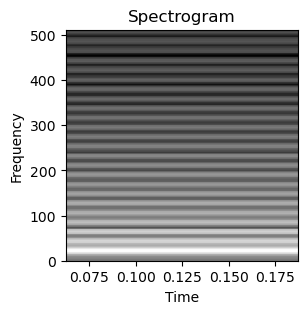

In [12]:

import os 
import datetime

# Specify the folder path to save the images
folder_path = 'D:\\testapi\\ml_testing\\peak_spectrogram'

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Loop through the selected peak windows
# Plot the spectrogram and save the image to the folder
# We are saving the spectrogram images with 300x300 pixels size and grayscale colormap
# This will later be used for training our model
# We are also adding a timestamp to the filename to make it unique
 
for i, window in enumerate(selected_peak_windows):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.specgram(window, Fs=1024, mode='psd', scale='dB', cmap='gray')

    # Set labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_title('Spectrogram')

    # Set the figure size to 300x300
    fig.set_size_inches(3, 3)
    
    # Get the current date and time
    now = datetime.datetime.now()

    # Format the date and time as a string
    timestamp = now.strftime("%Y%m%d_%H%M%S")

    # Save the spectrogram image to the folder with a unique filename
    filename = f'spectrogram_{i}_{timestamp}.png'
    save_path = os.path.join(folder_path, filename)
    plt.savefig(save_path)

In [13]:
# In this cell, we are selecting a single window from the windows randomly without the peak
# After that, we are storing the selected windows in a list

import random

# Initialising the list to store the selected windows without peaks
selected_non_peak_windows = []

for i, element in enumerate(updated_signal_dictionary):
  # Access key, signal, peaks, and real_peak
  key = element[0]  # Assuming key is the first element
  signal = element[1]  # Assuming signal is the second element (Pandas Series)
  peaks = element[2]  # Assuming peaks are the third element
  real_peak_value = float(element[3])  # Convert real_peak to float (assuming numerical)  
  
  # Define window size
  window_size = 300  
  
  # Create a list to store the windows without the peak
  windows_without_peak = []

  # Loop through the signal in steps of window_size
  for k in range(0, len(signal), window_size):
    window = signal.iloc[k:k+window_size]
    
    # Check if the real_peak_value is not present in the window
    if real_peak_value not in window.values:
      windows_without_peak.append(window)

  # Select a random window from the windows_without_peak list
  selected_window = random.choice(windows_without_peak)
  
  selected_non_peak_windows.append((selected_window)) # Append the selected window to selected_non_peak_windows

In [14]:
# Print the selected windows
if selected_non_peak_windows:
  print("Selected window:")
  for window in selected_non_peak_windows:
    # Assuming window is a NumPy array
    print(f"Window: {window}")  # Prints the content of window
else:
  print("No window selected.")

Selected window:
Window: 6316    -83
6317    -68
6318    -52
6319    -28
6320     -9
       ... 
6611     36
6612     42
6613     45
6614     50
6615     60
Name: 94, Length: 300, dtype: object


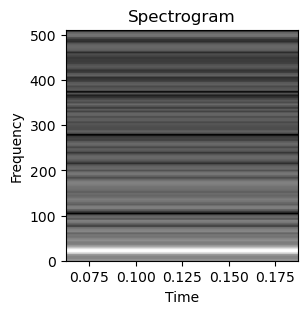

In [15]:
import os 

# Specify the folder path to save the images
folder_path = 'D:\\testapi\\ml_testing\\non_peak_spectrogram'

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Loop through the selected non-peak windows
# Plot the spectrogram and save the image to the folder
# We are saving the spectrogram images with 300x300 pixels size and grayscale colormap
# This will later be used for training our model
# We are also adding a timestamp to the filename to make it unique

for i, window in enumerate(selected_non_peak_windows):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.specgram(window, Fs=1024, mode='psd', scale='dB', cmap='gray')

    # Set labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_title('Spectrogram')

    # Set the figure size to 300x300
    fig.set_size_inches(3, 3)
    
    # Get the current date and time
    now = datetime.datetime.now()

    # Format the date and time as a string
    timestamp = now.strftime("%Y%m%d_%H%M%S")

    # Save the spectrogram image to the folder with a unique filename
    filename = f'spectrogram_{i}_{timestamp}.png'
    save_path = os.path.join(folder_path, filename)
    plt.savefig(save_path)